In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load JSON data
gini_filepath = './results/gini_components_by_year_18plus_winsorized.json'
with open(gini_filepath) as f:
    data = json.load(f)

In [8]:
sample = pd.read_csv('./data/cps_data/1983_sample.csv')


In [11]:
sample['winsor99']

0         True
1         True
2         True
3         True
4         True
          ... 
116072    True
116073    True
116074    True
116075    True
116076    True
Name: winsor99, Length: 116077, dtype: bool

In [2]:
df = pd.DataFrame.from_dict(data, orient='index')
df.reset_index(inplace=True)
df.rename(columns={'index': 'year'}, inplace=True)
df['year'] = df['year'].astype(int)
df = df.sort_values('year')
df

,year,exploitation,patronage,exclusion,rationing,total
0,1976,0.000440,0.000188,0.272747,0.099356,0.372731
1,1977,0.000279,0.000114,0.288471,0.107007,0.395872
2,1978,0.000264,0.000107,0.285437,0.108807,0.394616
3,1979,0.000284,0.000159,0.308051,0.156410,0.464904
4,1980,0.000263,0.000180,0.329422,0.206199,0.536064
5,1981,0.000257,0.000168,0.328372,0.203343,0.532140
6,1982,0.000275,0.000182,0.325568,0.204581,0.530606
7,1983,0.000300,0.000197,0.335375,0.205427,0.541299
8,1984,0.000295,0.000192,0.335124,0.206592,0.542203
9,1985,0.000312,0.000197,0.334319,0.206052,0.540880


In [3]:
df = df[df['year'] >= 1983]

In [4]:
# Calculate percentage contributions
df['exploitation_percent'] = (df['exploitation'] / df['total']) * 100
df['exclusion_percent'] = (df['exclusion'] / df['total']) * 100
df['patronage_percent'] = (df['patronage'] / df['total']) * 100
df['rationing_percent'] = (df['rationing'] / df['total']) * 100

# # Reset index to have 'year' as a column
# df.reset_index(inplace=True)

/var/folders/lm/19nvcr8165sg016zr309_t000000gn/T/ipykernel_3687/4089257071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exploitation_percent'] = (df['exploitation'] / df['total']) * 100
/var/folders/lm/19nvcr8165sg016zr309_t000000gn/T/ipykernel_3687/4089257071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exclusion_percent'] = (df['exclusion'] / df['total']) * 100
/var/folders/lm/19nvcr8165sg016zr309_t000000gn/T/ipykernel_3687/4089257071.py:4: SettingWithCopyWarning: 
A value is trying 

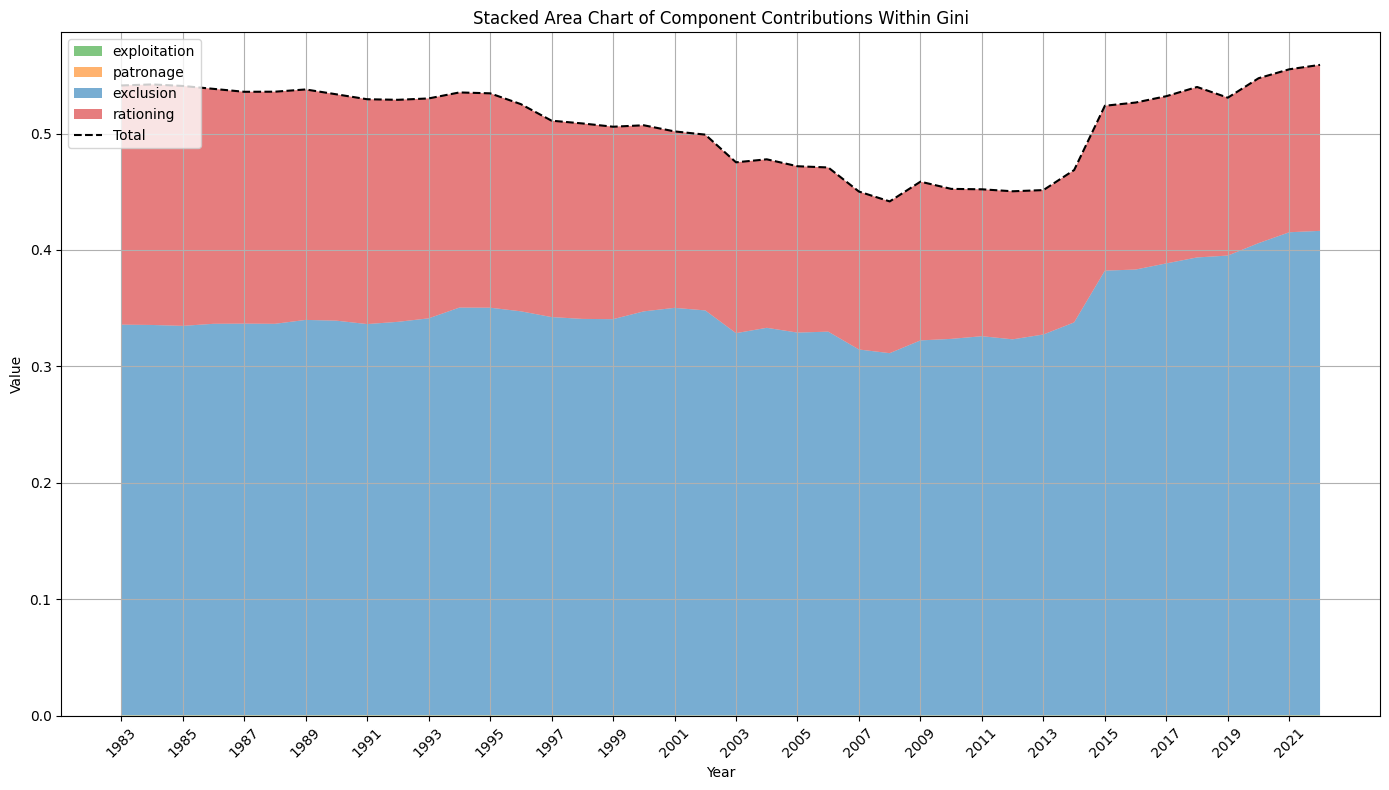

In [5]:
components = ['exploitation', 'patronage', 'exclusion', 'rationing']
colors = ['#2ca02c', '#ff7f0e', '#1f77b4', '#d62728', '#9467bd']  # Blue, Orange, Green, Red


# Create the stacked area chart
plt.figure(figsize=(14, 8))
plt.stackplot(df['year'], 
              df[components].T, 
              labels=components,
              colors=colors,
              alpha=0.6)

# Plot the total value as a line
plt.plot(df['year'], df['total'], color='black', linestyle='--', label='Total')

# Formatting
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Stacked Area Chart of Component Contributions Within Gini')
plt.legend(loc='upper left')
plt.grid(True)

# Rotate the x-axis labels and adjust the layout
plt.xticks(df['year'][::2], rotation=45)
plt.tight_layout()
plt.show()

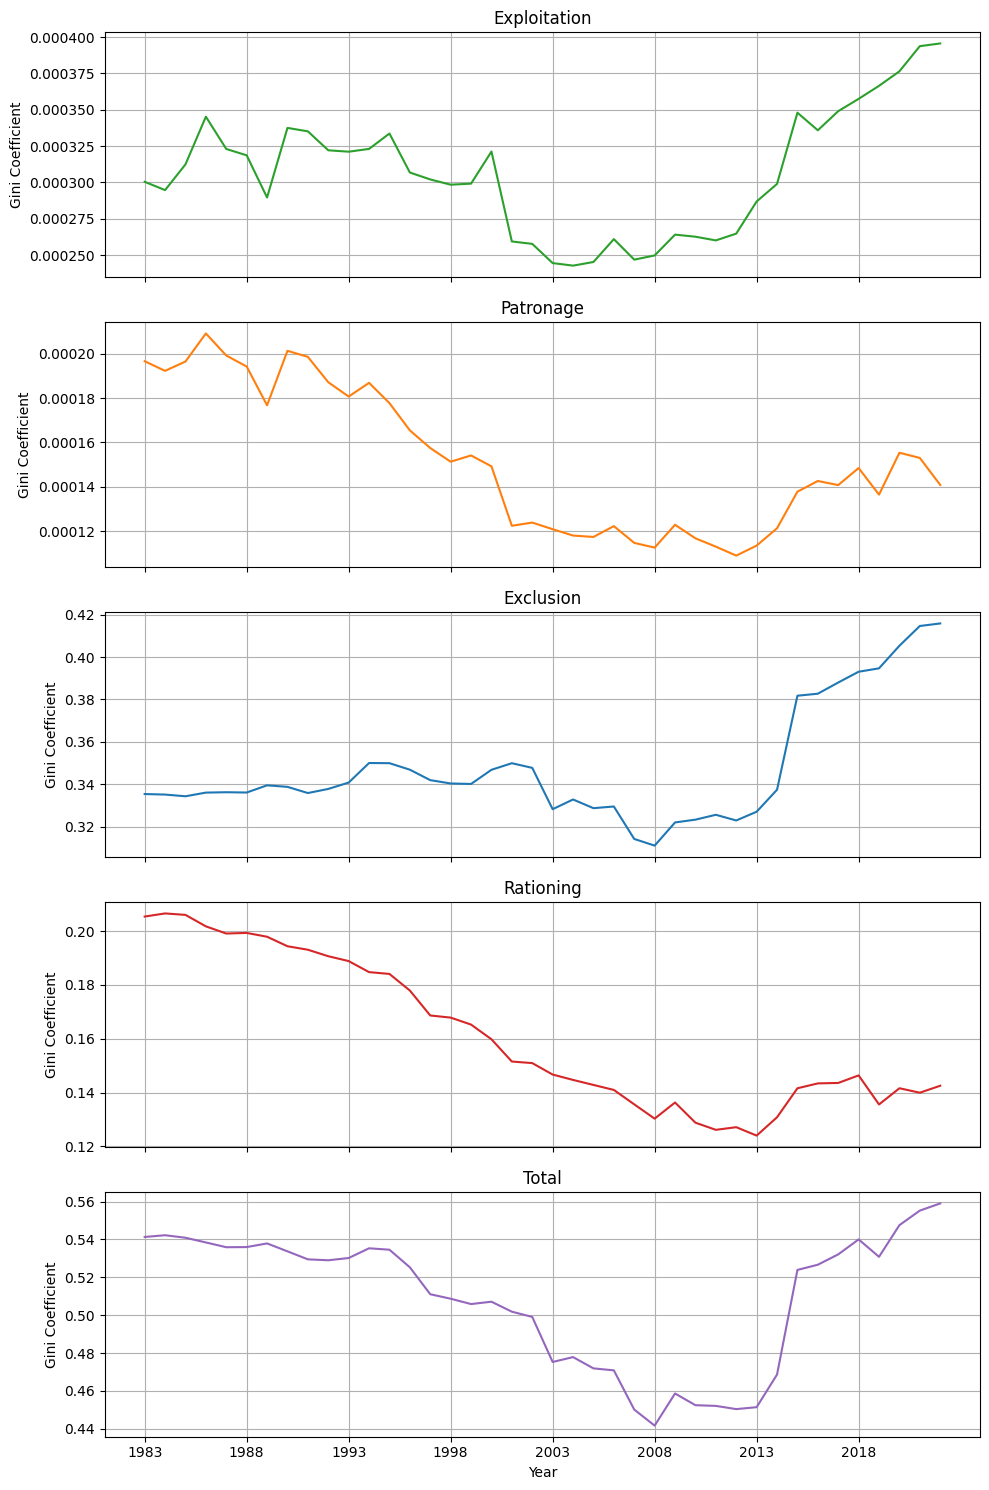

In [6]:
components = ['exploitation', 'patronage', 'exclusion', 'rationing', 'total']

# Plotting
fig, axs = plt.subplots(len(components), 1, figsize=(10, 15), sharex=True)

for i, component in enumerate(components):
    axs[i].plot(df['year'], df[component], label=f'Gini {component}', color=colors[i])
    axs[i].set_title(f'{component.capitalize()}')
    axs[i].set_ylabel('Gini Coefficient')
    # axs[i].set_ylim(0, 1)
    axs[i].grid(True)
    axs[i].set_xticks(df['year'][::5])

axs[-1].set_xlabel('Year')
plt.tight_layout()
plt.show()

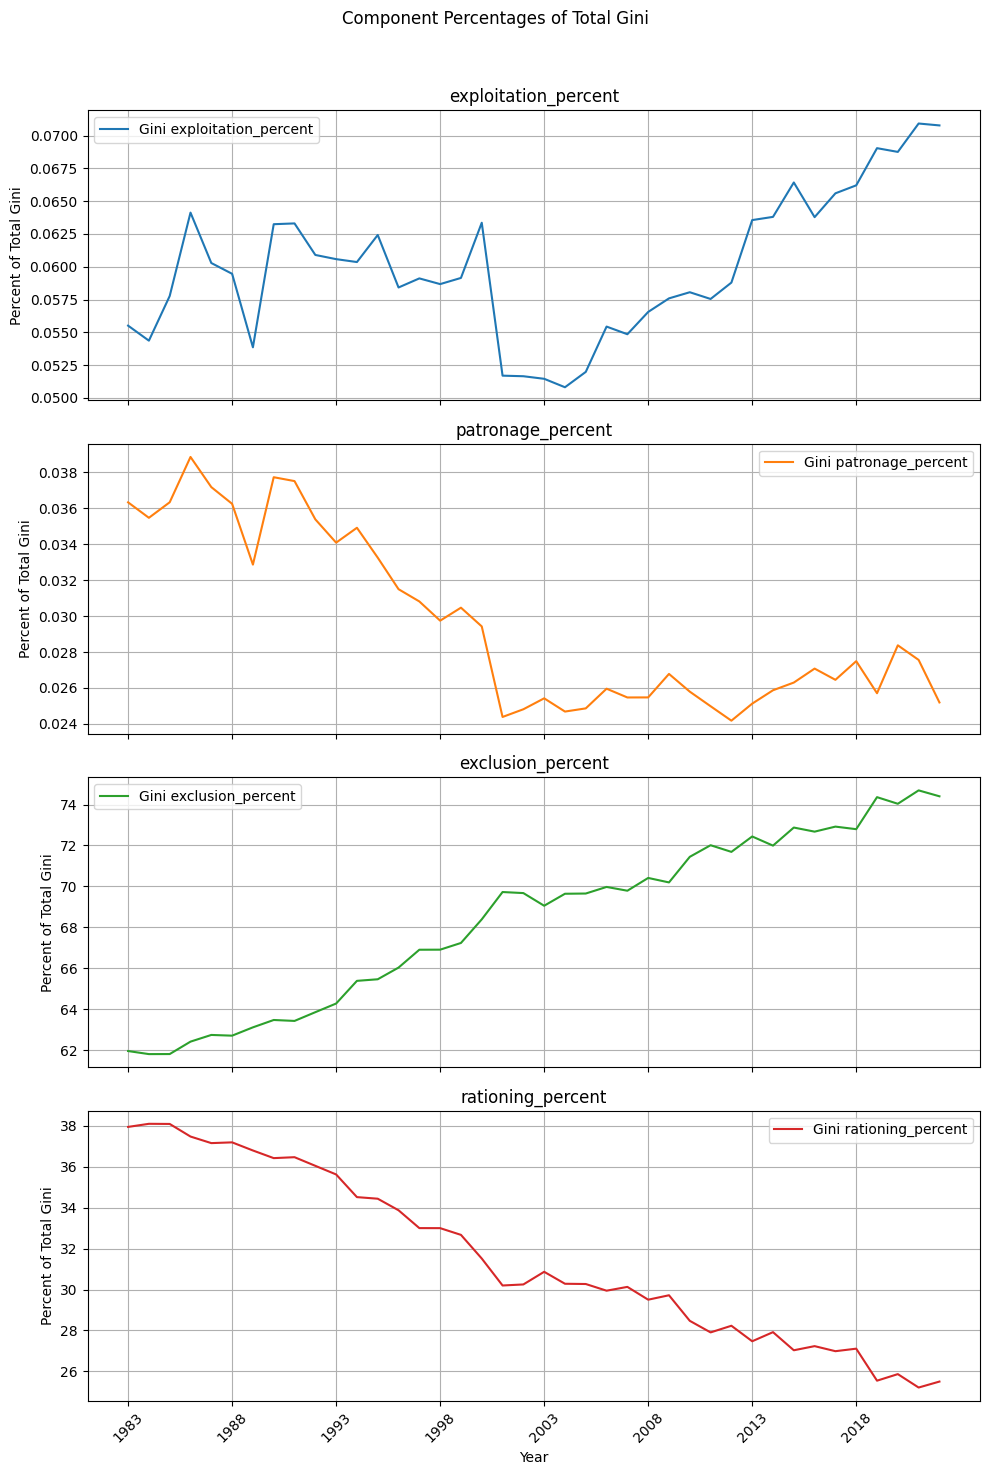

In [7]:
components = ['exploitation_percent', 'patronage_percent', 'exclusion_percent', 'rationing_percent']

# Plotting
fig, axs = plt.subplots(len(components), 1, figsize=(10, 15), sharex=True)
fig.suptitle('Component Percentages of Total Gini')

for i, component in enumerate(components):
    axs[i].plot(df['year'], df[component], label=f'Gini {component}', color=f'C{i}')
    axs[i].set_title(f'{component}')
    axs[i].set_ylabel('Percent of Total Gini')
    axs[i].grid(True)
    axs[i].legend()
    axs[i].set_xticks(df['year'][::5])
    axs[i].set_xticklabels(df['year'][::5], rotation=45)

axs[-1].set_xlabel('Year')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [8]:
# Step 1: Load the CSV file into a pandas DataFrame
df = pd.read_csv('./data/cps_data/all_years.csv')

df = df[(df['AGE'] >= 18) & (df['winsor99']) & (df['YEAR'] >= 1977)]

# Step 2: Ensure the 'year' column is the index and sort the DataFrame by year
df['year'] = pd.to_datetime(df['YEAR'], format='%Y')
df.set_index('year', inplace=True)
df.sort_index(inplace=True)

# Step 3: Plot the time series for each variable
variables = ['labor_income', 'capital_income', 'INCDRT', 'INCINT', 'INCBUS', 'INCFARM', 'INCWAGE']  # replace with your actual variable names

# Step 3: Group by year and calculate the mean for each variable
df_mean = df.groupby('year').mean()
df_stats = df.groupby('YEAR').agg(['mean', 'std', 'min', 'max', 'median'])

/var/folders/lm/19nvcr8165sg016zr309_t000000gn/T/ipykernel_3652/1007237837.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby('year').mean()


KeyboardInterrupt: 

In [ ]:
# Step 5: Plot each variable in a separate plot with mean, std deviation, min, and max
for variable in variables:
    plt.figure(figsize=(10, 6))
    
    # Mean
    plt.plot(df_stats.index, df_stats[(variable, 'mean')], marker='o', linestyle='-', label=f'{variable} mean')
    plt.plot(df_stats.index, df_stats[(variable, 'median')], marker='o', linestyle='-', label=f'{variable} median')
    
    # Standard Deviation
    plt.fill_between(df_stats.index, 
                     df_stats[(variable, 'mean')] - df_stats[(variable, 'std')], 
                     df_stats[(variable, 'mean')] + df_stats[(variable, 'std')],
                     color='gray', alpha=0.2, label=f'{variable} ± 1 std')
    
    # Min and Max
    plt.plot(df_stats.index, df_stats[(variable, 'min')], marker='x', linestyle='--', label=f'{variable} min', color='red')
    plt.plot(df_stats.index, df_stats[(variable, 'max')], marker='x', linestyle='--', label=f'{variable} max', color='green')
    
    # Formatting the plot
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.title(f'Time Series of {variable} by Year')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [ ]:
# Create a new column for the state x industry combination
df['stateXindustry'] = df['STATEFIP'].astype(str) + '-' + df['IND1950'].astype(str)

# Calculate the number of unique state x industry combinations per year
unique_combinations_per_year = df.groupby('YEAR')['stateXindustry'].nunique()

states_per_year = df.groupby('YEAR')['stateXindustry'].nunique()

# Calculate the number of rows per year
rows_per_year = df.groupby('YEAR').size()

# Calculate the median number of people per state x industry combination per year
median_people_per_combination_per_year = df.groupby(['YEAR', 'stateXindustry']).size().groupby('YEAR').median()

# Plotting the results
plt.figure(figsize=(14, 8))

# Plot unique combinations per year
plt.subplot(3, 1, 1)
plt.plot(unique_combinations_per_year.index, unique_combinations_per_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Unique State x Industry Combinations')
plt.title('Unique State x Industry Combinations Per Year')
plt.grid(True)

# Plot rows per year
plt.subplot(3, 1, 2)
plt.plot(rows_per_year.index, rows_per_year.values, marker='o', linestyle='-', color='g')
plt.xlabel('Year')
plt.ylabel('Number of Rows')
plt.title('Number of Rows Per Year')
plt.grid(True)

# Plot median number of people per state x industry combination per year
plt.subplot(3, 1, 3)
plt.plot(median_people_per_combination_per_year.index, median_people_per_combination_per_year.values, marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('Median Number of People per State x Industry Combination')
plt.title('Median Number of People per State x Industry Combination Per Year')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# stacked area chart
plt.figure(figsize=(12, 8))
plt.stackplot(df['year'], 
              df['exploitation_percent'], 
              df['exclusion_percent'], 
              df['patronage_percent'], 
              df['rationing_percent'], 
              labels=['Exploitation', 'Exclusion', 'Patronage', 'Rationing'])

plt.xlabel('Year')
plt.ylabel('Percentage of Total (%)')
plt.title('Stacked Area Chart of Component Contributions Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Line graph
plt.figure(figsize=(12, 8))

plt.plot(df['year'], df['exploitation_percent'], label='Exploitation', marker='o')
plt.plot(df['year'], df['exclusion_percent'], label='Exclusion', marker='o')
plt.plot(df['year'], df['patronage_percent'], label='Patronage', marker='o')
plt.plot(df['year'], df['rationing_percent'], label='Rationing', marker='o')

plt.xlabel('Year')
plt.ylabel('Percentage of Total (%)')
plt.title('Percentage of Total by Component Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
unprocessed_data = pd.read_csv('./data/cps_data/all_years.csv')

# Group by 'year' and count the number of unique 'IND' codes for each year
distinct_codes_per_year = unprocessed_data.groupby('income_year')['IND1950'].nunique()

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(distinct_codes_per_year.index, distinct_codes_per_year.values, marker='o', linestyle='-')

# Formatting
plt.xlabel('Year')
plt.ylabel('Number of Distinct IND Codes')
plt.title('Number of Distinct IND Codes Per Year')
plt.grid(True)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

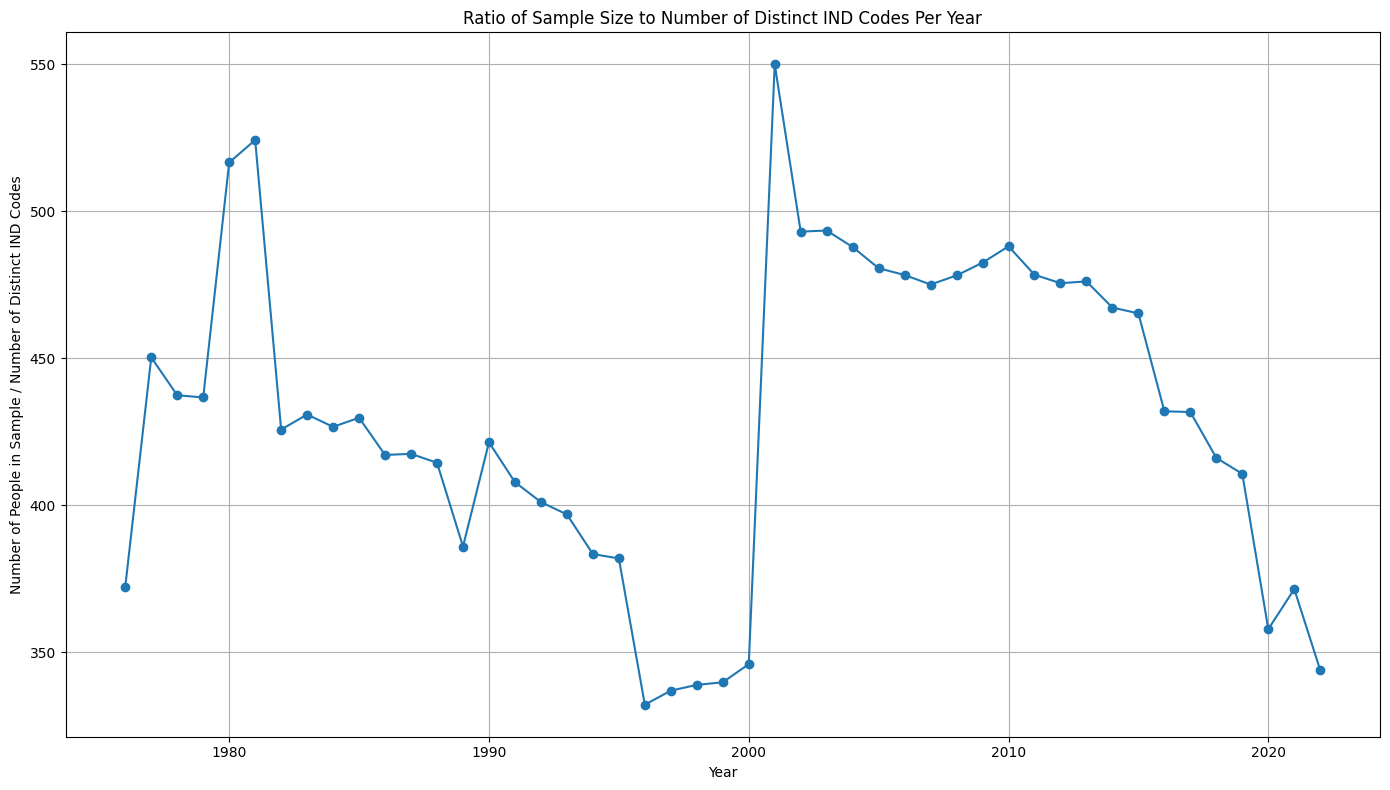

In [62]:
# Calculate the number of people per year
people_per_year = unprocessed_data.groupby('YEAR').size()

# Calculate the ratio of number of people per year to the number of distinct codes per year
ratio_per_year = people_per_year / distinct_codes_per_year

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(ratio_per_year.index, ratio_per_year.values, marker='o', linestyle='-')

# Formatting
plt.xlabel('Year')
plt.ylabel('Number of People in Sample / Number of Distinct IND Codes')
plt.title('Ratio of Sample Size to Number of Distinct IND Codes Per Year')
plt.grid(True)
plt.tight_layout()
plt.show()